<a href="https://colab.research.google.com/github/IvyCheng00/academic-projects/blob/main/custom-image-generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 自訂圖像生成器

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install diffusion transformers accelerate safetensors huggingface_hub gradio --upgrade

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.2/249.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.2 MB/s eta 0:00:00
   ━━━

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionPipeline, UniPCMultistepScheduler
import torch
import gc
import matplotlib.pyplot as plt
import gradio as gr
import random

# 讀入模型

In [ ]:
model_name = "liamhvn/disney-pixar-cartoon-b"

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    use_safetensors=True
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# 生成之函式

In [ ]:
def generate_image(prompt, use_enhance, enhance_text, use_negative, negative_text,
          use_custom_seed, custom_seed, height, width, steps, num_images):
  height = int(height)
  width = int(width)

  if height % 8 != 0 or width % 8 != 0:
    raise ValueError("Height and width must be divisible by 8")

  if use_custom_seed:
    base_seed = int(custom_seed)
  else:
    base_seed = random.randint(0, 2**32 - 1)

  seeds = [base_seed + i for i in range(num_images)]

  prompts =[]
  negative_prompts = []
  generators = []

  final_propmt = prompt
  if use_enhance and enhance_text:
    final_prompt = prompt + ", " + enhance_text

  final_negative = negative_text if use_negative else None

  for seed in seeds:
    g = torch.Generator("cuda").manual_seed(seed)
    generators.append(g)
    prompts.append(final_prompt)
    negative_prompts.append(final_negative)

  gc.collect()
  torch.cuda.empty_cache()

  images = []
  num_images = int(num_images)
  for i in range(num_images):
    with torch.no_grad():
      image = pipe(
          prompt=prompts[i],
          negative_prompt=negative_prompts[i] if final_negative else None,
          height=height,
          width=width,
          num_inference_steps=steps,
          guidance_scale=7.5,
          generator=generators[i]
      ).images[0]
      images.append(image)

  return images, f"Random seeds: {seeds}"

# Gradio Web APP

In [ ]:
# 以下 default_enhance 、default_negative 由AI提供
default_enhance = "masterpiece, best quality, ultra-detailed, high-resolution"
default_negative = "low quality, bad anatomy, blurry, deformed, extra limbs, extra fingers, missing fingers"

with gr.Blocks(css=".gradio-container {background-color: #478058; padding: 52px} .gr-button {font-size: 16px; background-color: White}") as demo:
  gr.Markdown("""
  # 💎✨disney-pixar-cartoon-b圖像生成器
  """)

  with gr.Row():
    with gr.Column(scale=6):
      prompt = gr.Textbox(label="Prompt", placeholder="Input Prompt{prompt}", lines=3)
      with gr.Row():
        use_enhance = gr.Checkbox(label="Enhance Prompt", value=True)
        enhance_text = gr.Textbox(label="Enhance Text", value=default_enhance)

      with gr.Row():
        use_negative = gr.Checkbox(label="Negative Prompt", value=True)
        negative_text = gr.Textbox(label="Negative Text", value=default_negative)

      with gr.Row():
        use_custom_seed = gr.Checkbox(label="Custom Random Seed", value=False)
        custom_seed = gr.Number(label="Random Seed", value=42)

      with gr.Row():
        height = gr.Dropdown(["512", "768", "1024"], label="Height", value="512")
        width = gr.Dropdown(["512", "768", "1024"], label="Width", value="512")

      with gr.Row():
        steps = gr.Slider(10, 50, value=20, step=5, label="Steps")
        num_images = gr.Slider(1, 4, value=1, step=1, label="Number of Images")

      generate_btn = gr.Button("Generate")

    with gr.Column(scale=6):
      gallery = gr.Gallery(label="Generated Image", columns=2, object_fit="contain", height="auto")
      seed_info = gr.Label(label="Random Seeds")

      generate_btn.click(
          fn=generate_image,
          inputs=[prompt, use_enhance, enhance_text, use_negative, negative_text, use_custom_seed, custom_seed, height, width, steps, num_images],
          outputs=[gallery, seed_info]
      )

In [ ]:
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f7e96222f42fa4d9a4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://f7e96222f42fa4d9a4.gradio.live


**A rabbit, a cat, a dog, and a polar bear writing song lyrics together**

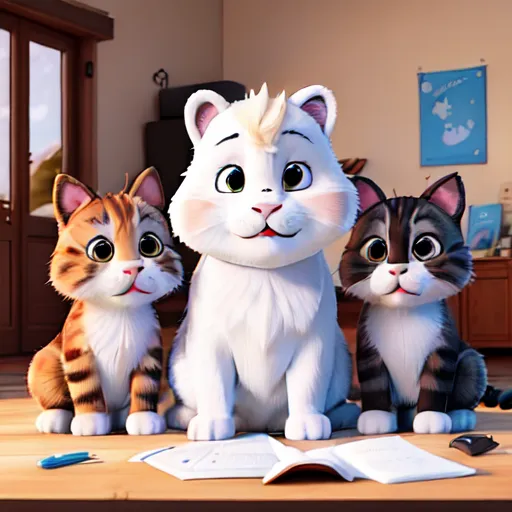

**A rabbit, a fawn, a puppy, a cat, and a bear cub singing togethe**

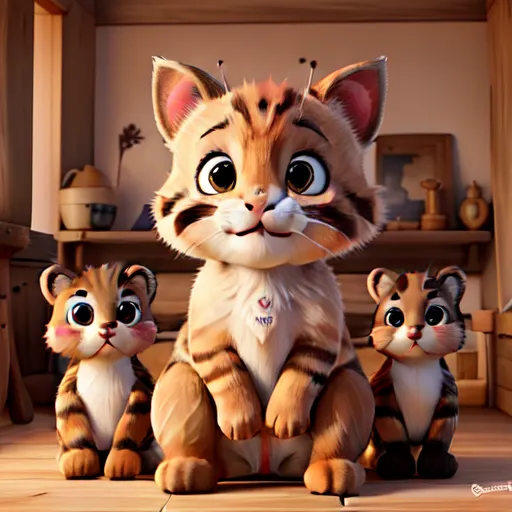

**A white cat, a black cat, a tiger, and an otter dancing together**

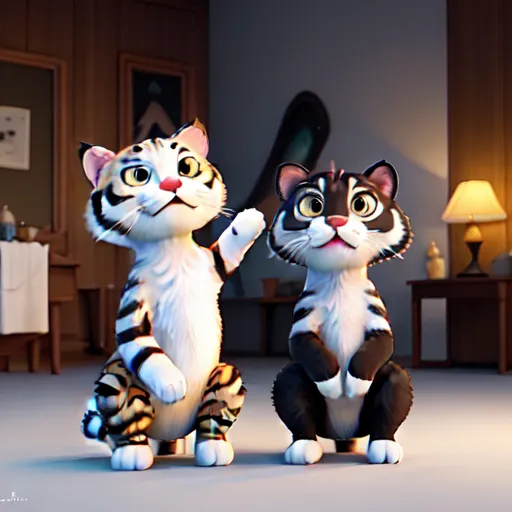